# Cobre Business Case
### Candidate: Jhoan Flores


## 1.- Importing Information from <a href="https://www.kaggle.com/datasets/ellipticco/elliptic-data-set/data">Kaggle</a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ellipticco/elliptic-data-set")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/elliptic-data-set


In [ ]:
import pandas as pd
import os

# Replace with actual path
path_to_dataset = "/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/"

elliptic_txs_features = pd.read_csv(os.path.join(path_to_dataset, 'elliptic_txs_features.csv'), header=None)
elliptic_txs_classes = pd.read_csv(os.path.join(path_to_dataset, 'elliptic_txs_classes.csv'))
elliptic_txs_edgelist = pd.read_csv(os.path.join(path_to_dataset, 'elliptic_txs_edgelist.csv'))


elliptic_txs_features.columns = ['txId'] + [f'V{i}' for i in range(1, 167)]

# Print the shapes of the datasets
print("elliptic_txs_features Rows:", elliptic_txs_features.shape[0], ", Cols:", elliptic_txs_features.shape[1])
print("elliptic_txs_classes Rows:", elliptic_txs_classes.shape[0], ", Cols:", elliptic_txs_classes.shape[1])
print("elliptic_txs_edgelist Rows:", elliptic_txs_edgelist.shape[0], ", Cols:", elliptic_txs_edgelist.shape[1])


elliptic_txs_features Rows: 203769 , Cols: 167
elliptic_txs_classes Rows: 203769 , Cols: 2
elliptic_txs_edgelist Rows: 234355 , Cols: 2


In [ ]:
# Displaying a small sample of each dataset
print("elliptic_txs_features:")
print(elliptic_txs_features.head())

print("\nelliptic_txs_classes:")
print(elliptic_txs_classes.head())

print("\nelliptic_txs_edgelist:")
print(elliptic_txs_edgelist.head())


elliptic_txs_features:
        txId  V1        V2        V3        V4         V5        V6        V7  \
0  230425980   1 -0.171469 -0.184668 -1.201369  -0.121970 -0.043875 -0.113002   
1    5530458   1 -0.171484 -0.184668 -1.201369  -0.121970 -0.043875 -0.113002   
2  232022460   1 -0.172107 -0.184668 -1.201369  -0.121970 -0.043875 -0.113002   
3  232438397   1  0.163054  1.963790 -0.646376  12.409294 -0.063725  9.782742   
4  230460314   1  1.011523 -0.081127 -1.201369   1.153668  0.333276  1.312656   

          V8        V9  ...      V157      V158      V159      V160      V161  \
0  -0.061584 -0.162097  ... -0.562153 -0.600999  1.461330  1.461369  0.018279   
1  -0.061584 -0.162112  ...  0.947382  0.673103 -0.979074 -0.978556  0.018279   
2  -0.061584 -0.162749  ...  0.670883  0.439728 -0.979074 -0.978556 -0.098889   
3  12.414558 -0.163645  ... -0.577099 -0.613614  0.241128  0.241406  1.072793   
4  -0.061584 -0.163523  ... -0.511871 -0.400422  0.517257  0.579382  0.018279   

   

## 2.- Exploratory Data Analysis

We are going to start with a review of the features to have a better understanding about their characteristics and/or limitations in order to get the insights for the next analysis.
We are going to star with the actors (**nodes**), our first exploring is about the "target". We have three labels according to the metadata: nodes have been labeled as being created by a "licit", "illicit" or "unknown" entity.






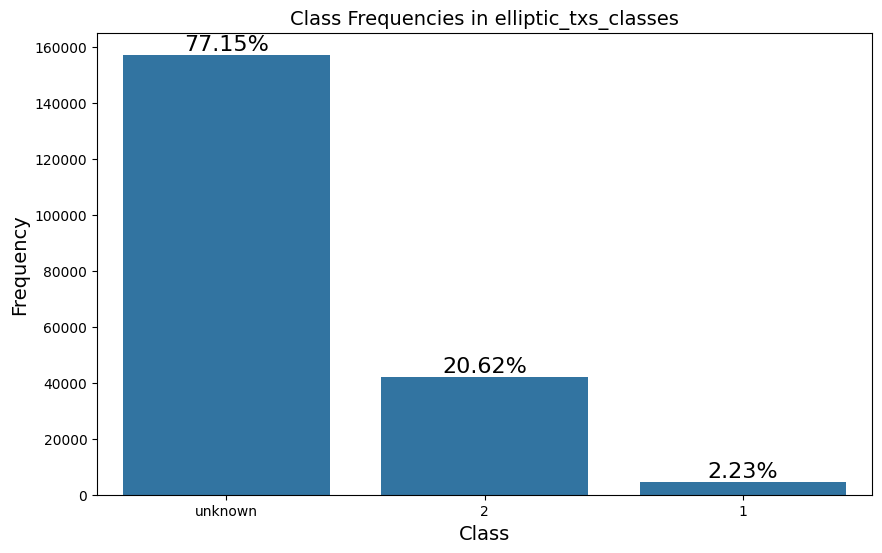

,Class,Frequency,Percentage
0,unknown,157205,77.148634
1,2,42019,20.620899
2,1,4545,2.230467


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequencies, counts, and percentages
class_counts = elliptic_txs_classes['class'].value_counts()
class_percentages = (class_counts / len(elliptic_txs_classes)) * 100

# Create a DataFrame for better visualization
class_summary = pd.DataFrame({
    'Class': class_counts.index,
    'Frequency': class_counts.values,
    'Percentage': class_percentages.values
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Frequency', data=class_summary)
plt.title('Class Frequencies in elliptic_txs_classes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Class', fontsize=14)

# Annotate the bars with percentages
for i, v in enumerate(class_summary['Frequency']):
    plt.text(i, v + 100, f"{class_summary['Percentage'][i]:.2f}%", ha='center', va='bottom', fontsize=16)

plt.show()

class_summary


As we can notice there is an imbalanced structure in our data set; only 2.23% or our nodes are labeled as "illicit" and around 21% as "licit" transactions.

In the next step, we are gonna explore more about the links.

In [ ]:
# Create graph from the edgelist.
import networkx as nx
G = nx.from_pandas_edgelist(elliptic_txs_edgelist, 'txId1', 'txId2')

Now we are starting the exploration of our network. First by calculating the degree distributions of the nodes, which basically show how many nodes have each degree (number of connections), this helps us to understand if we have a highly connected network or if we are in the presence of a dispersed network.

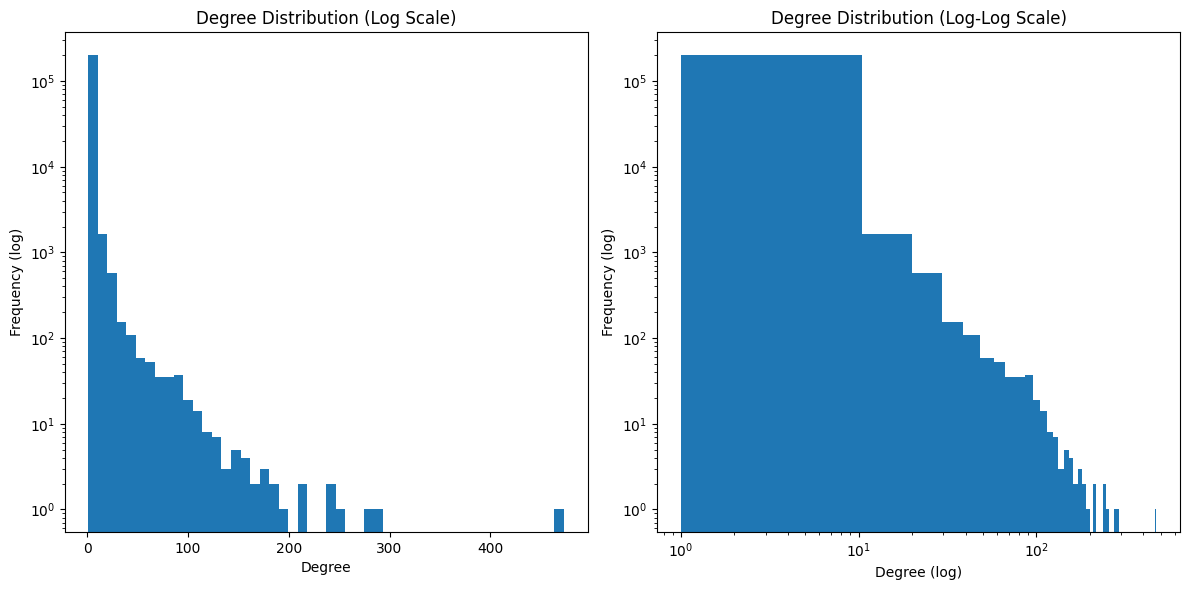

In [ ]:
# Degree distribution
degree_sequence = [d for n, d in G.degree()]

# Create a subplot for the degree distribution (log scale)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(degree_sequence, bins=50, log=True)
plt.title("Degree Distribution (Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency (log)")

# Create a subplot for the degree distribution (log-log scale)
plt.subplot(1, 2, 2)
plt.hist(degree_sequence, bins=50, log=True)
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution (Log-Log Scale)")
plt.xlabel("Degree (log)")
plt.ylabel("Frequency (log)")

plt.tight_layout()
plt.show()


In [ ]:
!pip install powerlaw

The data fits a power law distribution well for values ≥ 13, with an estimated exponent ≈ 2.57, and this fit is significantly better than the alternative model.

Calculating best minimal value for power law fit
Alpha (scaling exponent): 2.5702564426793075
xmin (cutoff): 13.0
Loglikelihood ratio: 8.48855383950353, p-value: 2.0922430210150893e-17


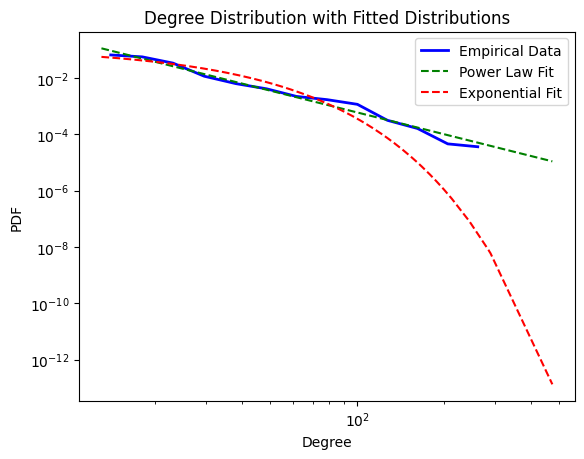

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
import networkx as nx

# Extract degree sequence
degree_sequence = [d for n, d in G.degree()]

# Fit the power-law distribution
results = powerlaw.Fit(degree_sequence, discrete=True)

# Print results
print("Alpha (scaling exponent):", results.power_law.alpha)
print("xmin (cutoff):", results.power_law.xmin)

# Compare power-law to exponential
R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print(f"Loglikelihood ratio: {R}, p-value: {p}")

# Plot
fig = results.plot_pdf(color='b', linewidth=2, label='Empirical Data')
results.power_law.plot_pdf(color='g', linestyle='--', ax=fig, label='Power Law Fit')
results.exponential.plot_pdf(color='r', linestyle='--', ax=fig, label='Exponential Fit')

plt.xlabel("Degree")
plt.ylabel("PDF")
plt.title("Degree Distribution with Fitted Distributions")
plt.legend()
plt.show()


In [ ]:
#Analyzing the nodes' degree:
degree_counts = dict(G.degree())
degree_df = pd.DataFrame(list(degree_counts.items()), columns=['Node', 'Degree'])
top_10_degrees = degree_df.nlargest(10, 'Degree')
print("Top 10 nodes with highest degree:\n", top_10_degrees)

zero_degree_nodes = degree_df[degree_df['Degree'] == 0]
num_zero_degree_nodes = len(zero_degree_nodes)
print("\nNumber of nodes with degree 0:", num_zero_degree_nodes)

one_degree_nodes = degree_df[degree_df['Degree'] == 1]
num_one_degree_nodes = len(one_degree_nodes)
print("\nNumber of nodes with degree 1:", num_one_degree_nodes)

Top 10 nodes with highest degree:
              Node  Degree
94301     2984918     473
130         89273     289
51483    43388675     284
51377    68705820     247
148195   30699343     241
35892    96576418     239
24761   225859042     212
19138   279187194     211
58098   234890810     199
189738  196107869     188

Number of nodes with degree 0: 0

Number of nodes with degree 1: 70341


In [ ]:
#Validating if exits self-loops:
equal_tx_count = len(elliptic_txs_edgelist[elliptic_txs_edgelist['txId1'] == elliptic_txs_edgelist['txId2']])
print(f"Number of rows where 'txId1' and 'txId2' are equal: {equal_tx_count}")


Number of rows where 'txId1' and 'txId2' are equal: 0


Considering we are gonna make more sophisticated calculations and computing limitations, I'll keep a representative sample to analyze the network.

In [ ]:
# Sample 10% of nodes from elliptic_txs_classes
sampled_nodes = elliptic_txs_classes.sample(frac=0.1, random_state=420)

sampled_tx_ids = sampled_nodes['txId'].tolist()

# Filter elliptic_txs_features to include only the sampled transactions
sampled_features = elliptic_txs_features[elliptic_txs_features['txId'].isin(sampled_tx_ids)]

# Filter elliptic_txs_edgelist to include only edges connected to the sampled transactions
sampled_edgelist = elliptic_txs_edgelist[
    elliptic_txs_edgelist['txId1'].isin(sampled_tx_ids) | elliptic_txs_edgelist['txId2'].isin(sampled_tx_ids)
]


print("Sampled Features Shape:", sampled_features.shape)
print("Sampled Edgelist Shape:", sampled_edgelist.shape)
print("Sampled Nodes Shape:", sampled_nodes.shape)


Sampled Features Shape: (20377, 167)
Sampled Edgelist Shape: (43982, 2)
Sampled Nodes Shape: (20377, 2)


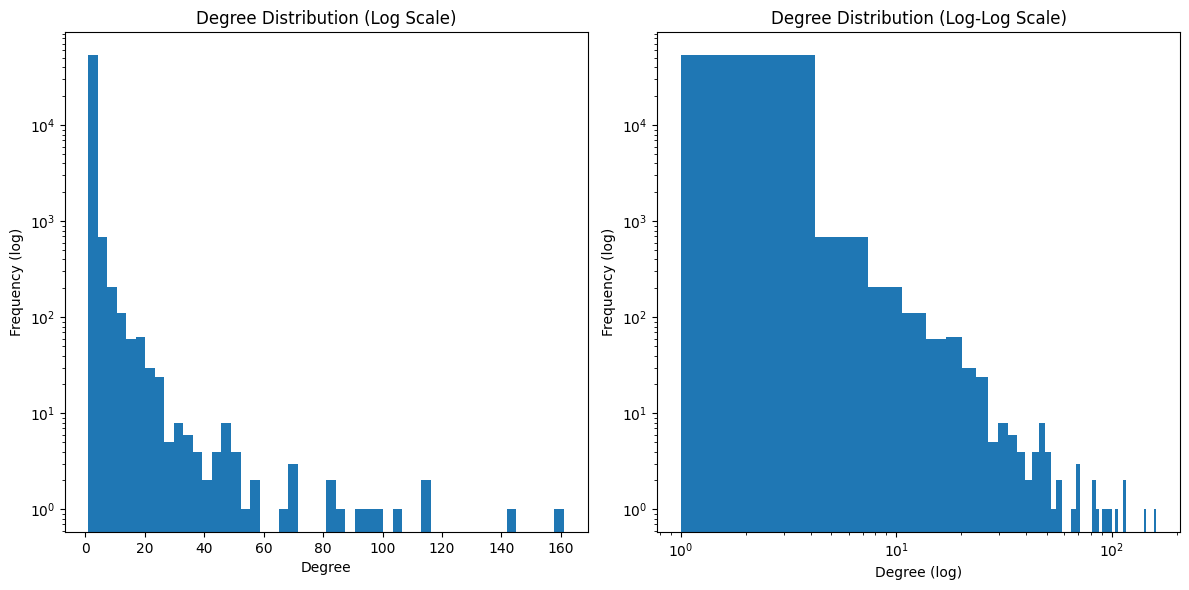

In [ ]:
# Degree distribution for sampled graph
degree_sequence = [d for n, d in nx.from_pandas_edgelist(sampled_edgelist, 'txId1', 'txId2').degree()]

# Create a subplot for the degree distribution (log scale)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(degree_sequence, bins=50, log=True)
plt.title("Degree Distribution (Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency (log)")

# Create a subplot for the degree distribution (log-log scale)
plt.subplot(1, 2, 2)
plt.hist(degree_sequence, bins=50, log=True)
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution (Log-Log Scale)")
plt.xlabel("Degree (log)")
plt.ylabel("Frequency (log)")

plt.tight_layout()
plt.show()


In [ ]:
# Create graph from the edgelist with the sampled nodes.
SG = nx.from_pandas_edgelist(sampled_edgelist, 'txId1', 'txId2')

### 2.1.- Giant Component Analysis

A *component in a graph is a subgraph in which a path exists from every single node to every other*.

When we work with large graphs (like this example), we can observe that there is often very large components. But there is one which is the largest, the **"Giant Component"**.
In this section, I explore the the characteristics of this Giant Component.

In [ ]:
#Claculating the connected componentes
connected_components = list(nx.connected_components(SG))

# Create a list of dictionaries, each containing component information.
component_info = []
for component in connected_components:
  component_size = len(component)
  component_info.append({'Component': component, 'Size': component_size})

# Create a DataFrame from the list of dictionaries.
component_df = pd.DataFrame(component_info)

# Sort the DataFrame by component size in descending order.
component_df = component_df.sort_values(by='Size', ascending=False)
print(component_df)

giant_component = max(nx.connected_components(SG), key=len)
print("Size Gian Component:", len(giant_component))

                                               Component  Size
11030  {33454081, 135526401, 156217346, 155707398, 15...   884
10056  {72304640, 41183236, 41183237, 73197576, 99948...   749
8706   {27949058, 69490698, 32243723, 16713740, 44562...   692
3200   {68464640, 36003841, 42971138, 68452354, 42758...   689
9767   {12677120, 13361153, 12800006, 12677126, 12800...   542
...                                                  ...   ...
11988                             {188680983, 103206927}     2
11987                             {188627344, 158612799}     2
11986                              {160456731, 29976372}     2
11985                             {158812394, 158277707}     2
11983                             {158269776, 158269766}     2

[11997 rows x 2 columns]
Size Gian Component: 884


In [ ]:
#frequency, count, and percentage
component_counts = component_df['Size'].value_counts()
component_percentages = (component_counts / len(component_df)) * 100

component_summary = pd.DataFrame({
    'Size': component_counts.index,
    'Count': component_counts.values,
    'Percentage': component_percentages.values
})

# Sort by Size in descending order
component_summary = component_summary.sort_values(by='Size', ascending=False)

# Display the table
component_summary


,Size,Count,Percentage
67,884,1,0.008335
68,749,1,0.008335
66,692,1,0.008335
65,689,1,0.008335
63,542,1,0.008335
...,...,...,...
4,6,335,2.792365
3,5,717,5.976494
2,4,1470,12.253063
0,3,4954,41.293657


There are lots of very low connected components, for example: 31% of the components are single link between two nodes, and 83% of the components have less or equal than 4 nodes. This represents a challenge in the modeling process because it reflects a sparse network.  

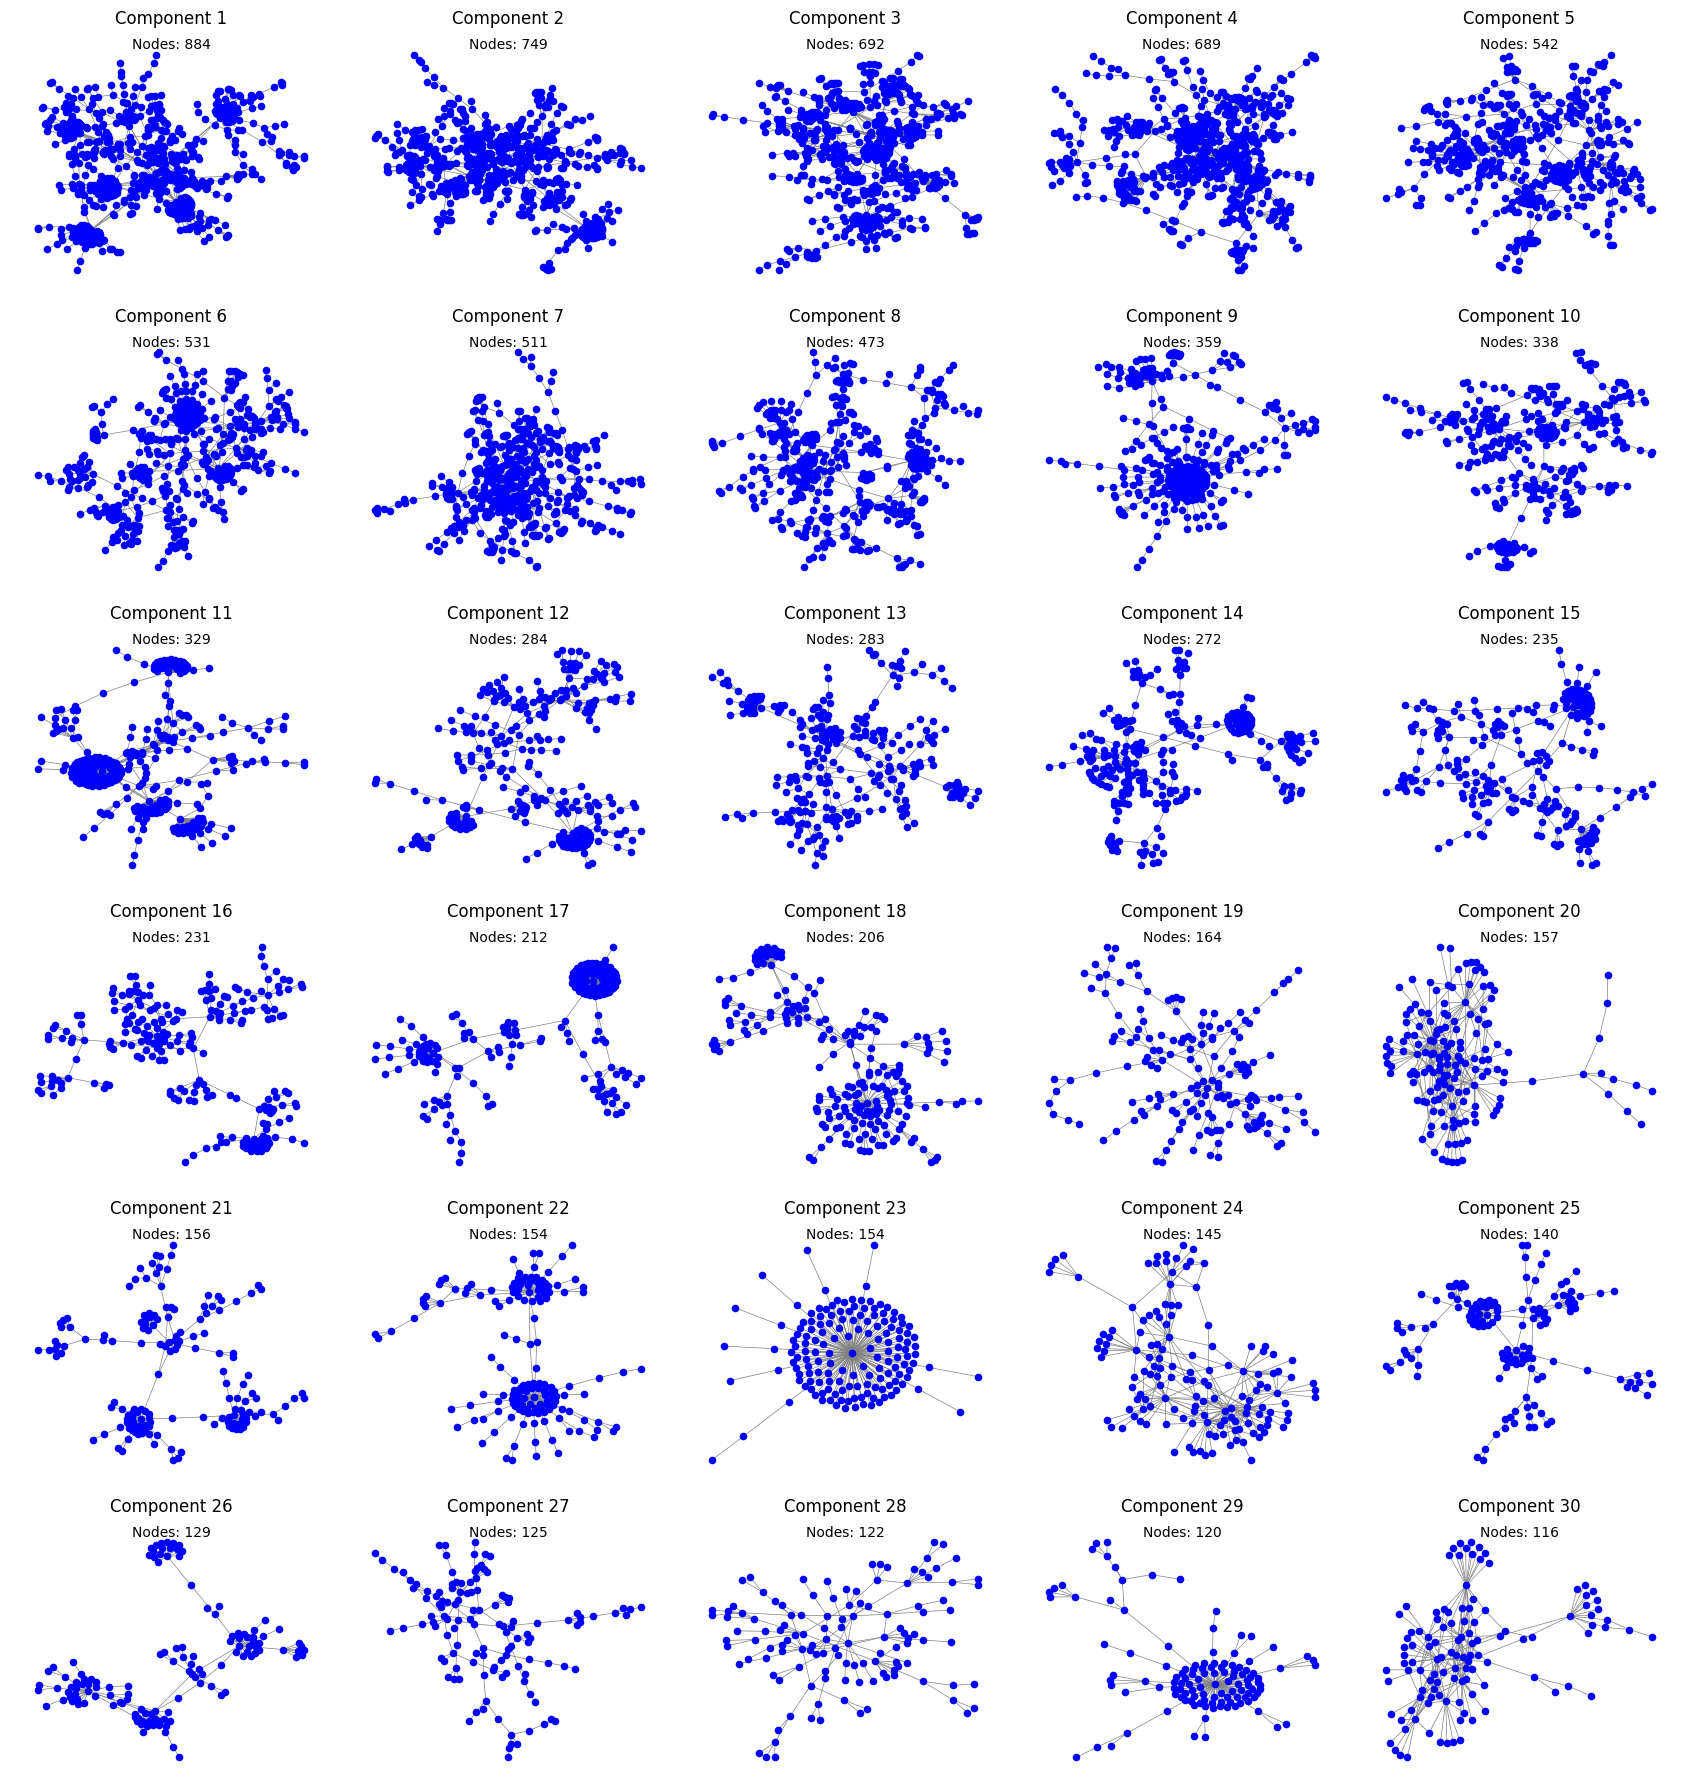

In [ ]:
# Exploring graphically the top 30 largest components
top_20_components = component_df.nlargest(30, 'Size')

# Create subplots
fig, axes = plt.subplots(6, 5, figsize=(17, 18))
for i, (index, row) in enumerate(top_20_components.iterrows()):
    component = row['Component']
    size = row['Size']

    row_num = i // 5
    col_num = i % 5

    # Create a subgraph for the current component
    subgraph = SG.subgraph(component)

    pos = nx.spring_layout(subgraph, seed=42)
    nx.draw(subgraph, pos, ax=axes[row_num, col_num], node_size=20, node_color="blue", edge_color="gray", width=0.5)

    # Including the component size
    axes[row_num, col_num].text(0.5, 0.95, f"Nodes: {size}", transform=axes[row_num, col_num].transAxes, ha='center', va='center')

    axes[row_num, col_num].set_title(f"Component {i+1}")

plt.tight_layout()
plt.show()


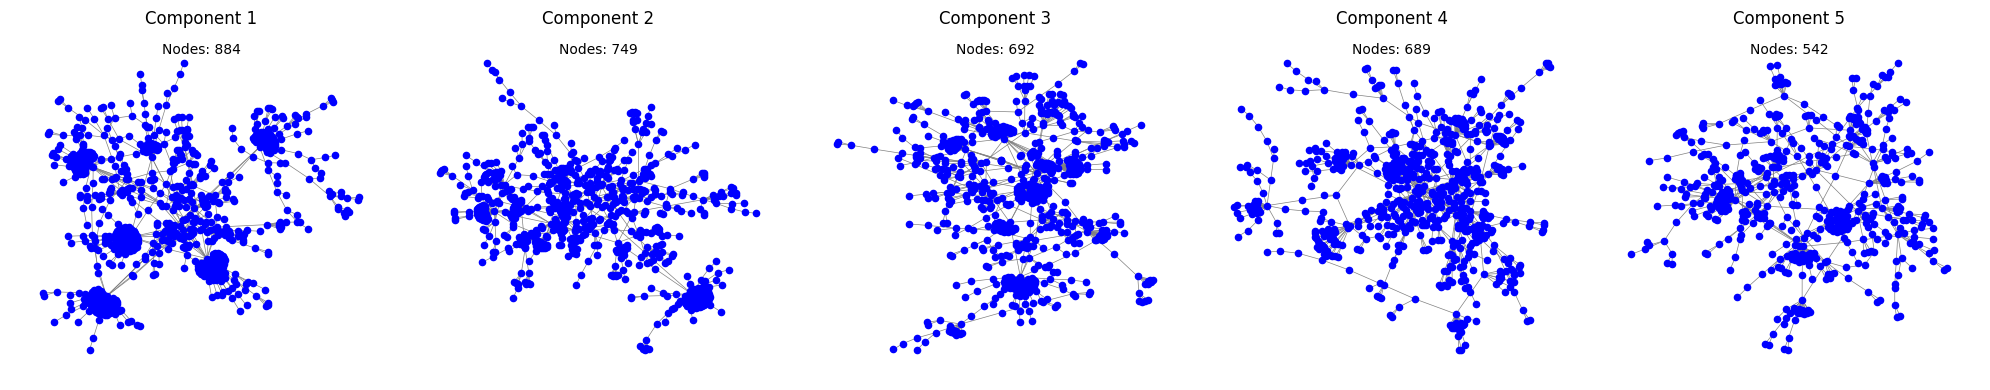

In [ ]:
#Exploring graphically the top 5 largest components
top_5_components = component_df.nlargest(5, 'Size')

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, (index, row) in enumerate(top_5_components.iterrows()):
    component = row['Component']
    size = row['Size']

    # Create a subgraph for the current component
    subgraph = SG.subgraph(component)

    pos = nx.spring_layout(subgraph, seed=42)
    nx.draw(subgraph, pos, ax=axes[i], node_size=20, node_color="blue", edge_color="gray", width=0.5)

    # Includng the componente size
    axes[i].text(0.5, 0.95, f"Nodes: {size}", transform=axes[i].transAxes, ha='center', va='center')

    axes[i].set_title(f"Component {i+1}")

plt.tight_layout()
plt.show()


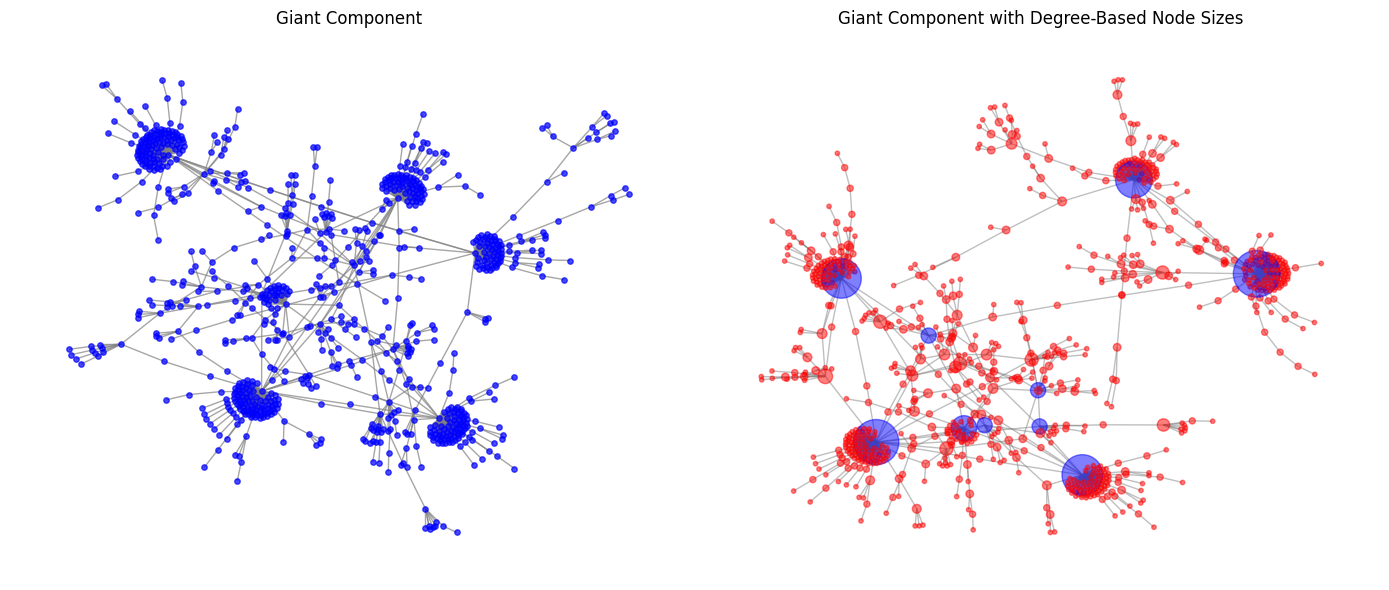

In [ ]:
# Finding the giant component
giant_component = max(nx.connected_components(SG), key=len)#in our network is the subgraph wih order 884

# Create a subgraph of the giant component
giant_component_graph = SG.subgraph(giant_component)

# Plot the giant component
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
nx.draw(giant_component_graph, with_labels=False, node_size=15, node_color="blue", edge_color="gray", alpha=0.7)
plt.title("Giant Component")

# Plot the giant component with degree-based node sizes
plt.subplot(1, 2, 2)

degree_centrality = nx.degree_centrality(giant_component_graph)
top_10_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
node_colors = ['red' if node not in top_10_nodes else 'blue' for node in giant_component_graph.nodes()]

node_sizes = [giant_component_graph.degree(node) * 10 for node in giant_component_graph.nodes()]
nx.draw(giant_component_graph, with_labels=False, node_size=node_sizes, node_color=node_colors, edge_color="gray", alpha=0.5)
plt.title("Giant Component with Degree-Based Node Sizes")


plt.tight_layout()
plt.show()

### 2.2.- Community Analysis

A network is said to have community structure if the nodes of the network can be easily grouped into set of nodes (like clusters), that implies such **that connections between the nodes are denser than connections with the rest of the network**.

For example, we can plot the communities in the top 5 components:

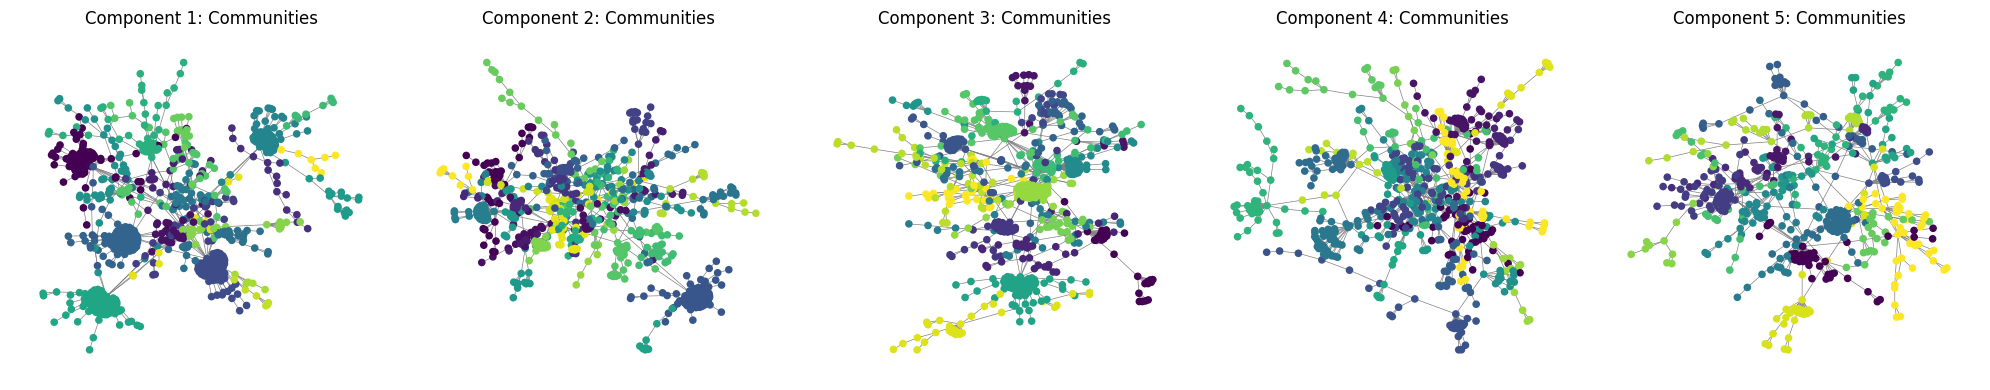

In [ ]:
import community as community_louvain
import matplotlib.cm as cm

# Function to calculate and plot communities
def analyze_communities(component_data, graph):
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i, (index, row) in enumerate(component_data.iterrows()):
        component = row['Component']
        subgraph = graph.subgraph(component)
        partition = community_louvain.best_partition(subgraph)
        pos = nx.spring_layout(subgraph, seed=42)
        nx.draw(subgraph, pos, ax=axes[i], node_size=20, node_color=list(partition.values()), cmap=plt.cm.viridis, edge_color="gray", width=0.5)
        axes[i].set_title(f"Component {i+1}: Communities")
    plt.tight_layout()
    plt.show()

# Call the function with the top 5 components and the graph
analyze_communities(top_5_components, SG)


<ipython-input-19-f40f5f1f33d9>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', max(partition.values()) + 1)
<ipython-input-19-f40f5f1f33d9>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('YlGnBu', max(partition.values()) + 1)


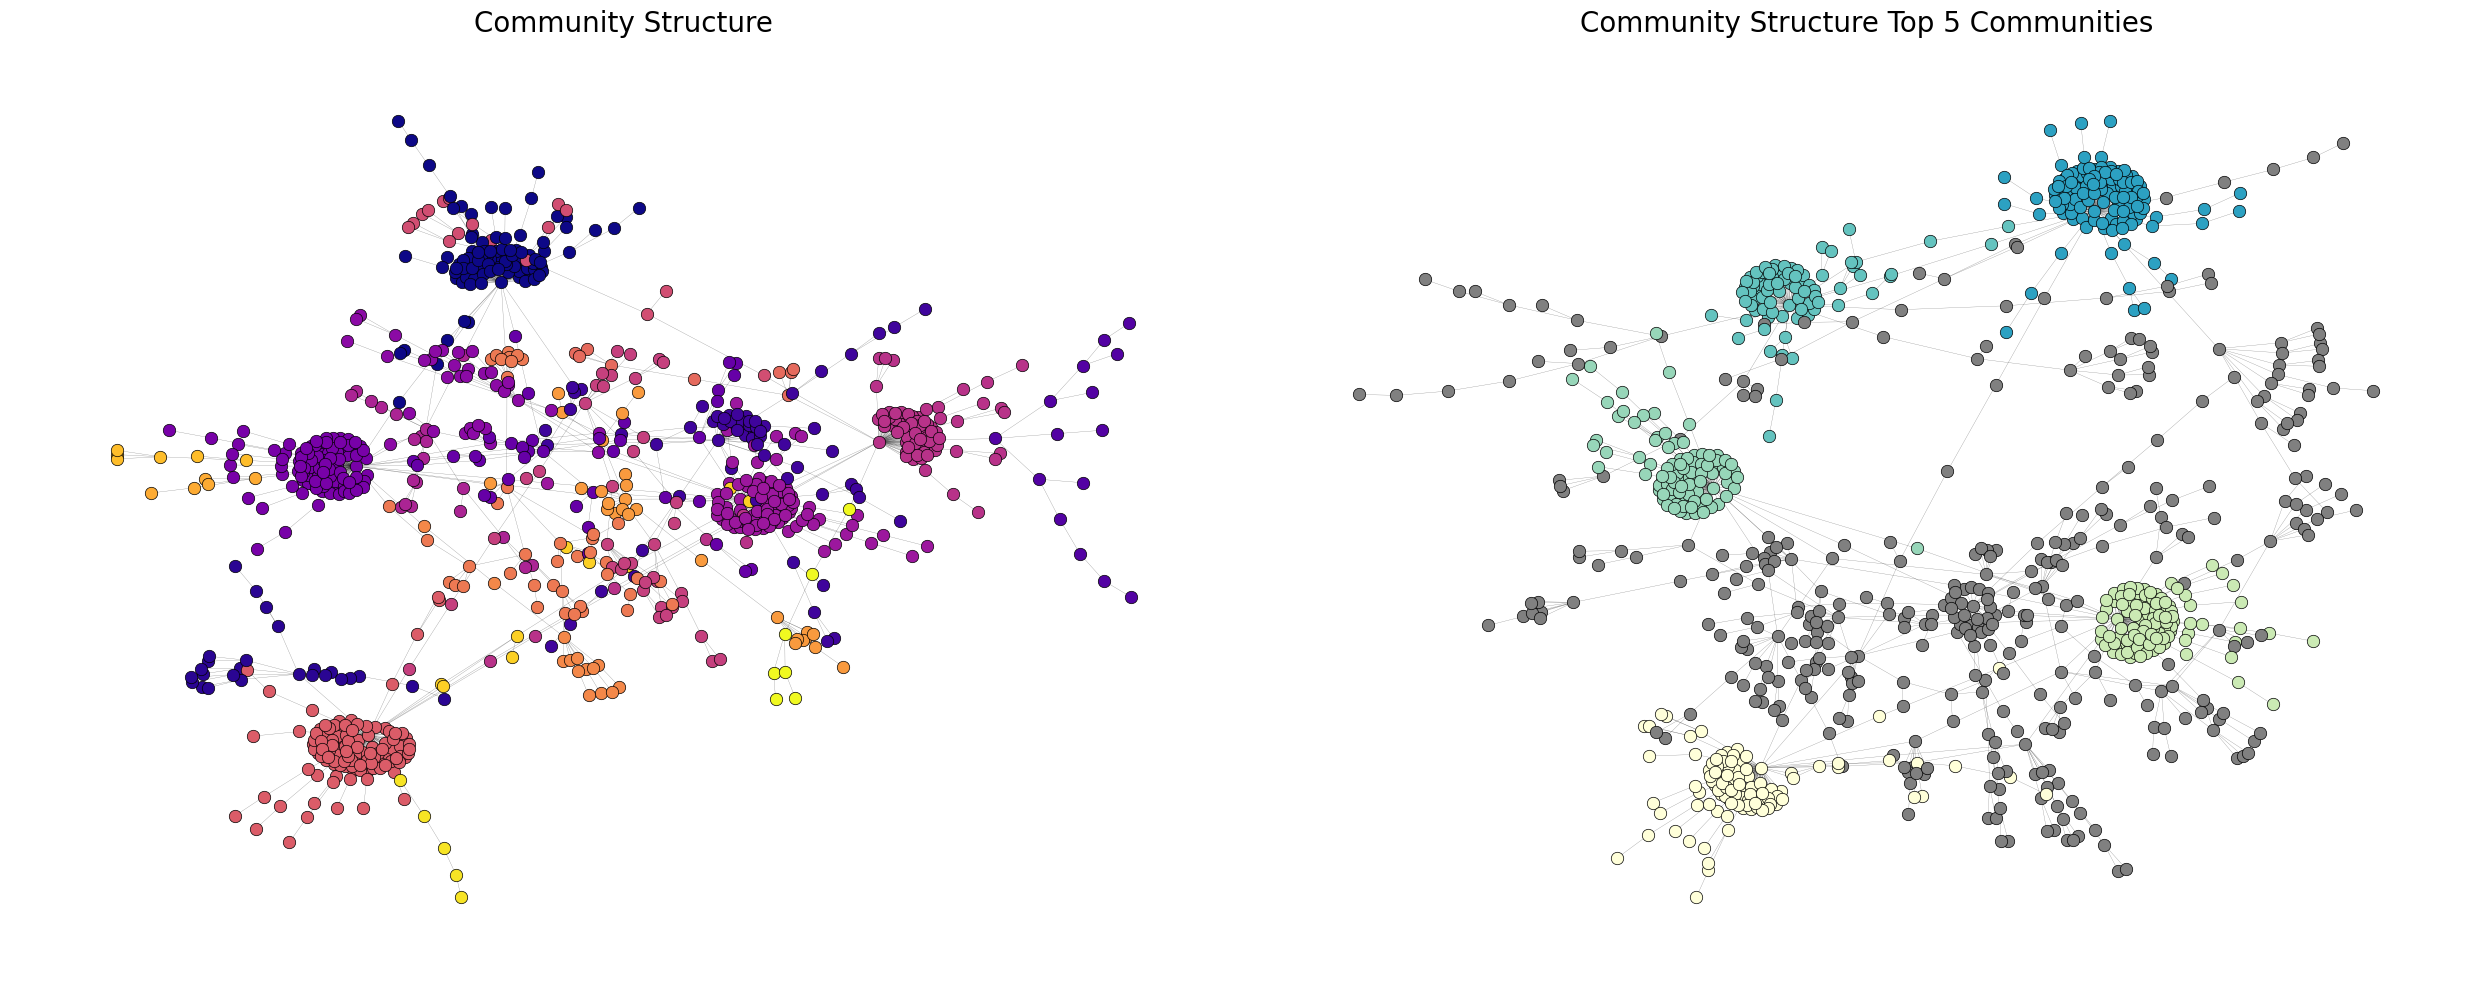

In [ ]:
# Compute the best partition
partition = community_louvain.best_partition(giant_component_graph)

# Ploting the communities:
plt.figure(figsize=(25, 10))

# First subplot: Original community structure
plt.subplot(1, 2, 1)
pos = nx.spring_layout(giant_component_graph)
cmap = cm.get_cmap('plasma', max(partition.values()) + 1)

for node, community in partition.items():
    nx.draw_networkx_nodes(giant_component_graph, pos, nodelist=[node], node_size=80,
                           node_color=[cmap(community)],
                           edgecolors='black', linewidths=0.5)

nx.draw_networkx_edges(giant_component_graph, pos, alpha=0.5, width=0.2)
plt.axis('off')
plt.title("Community Structure", fontsize=20)


# Second subplot: Top 5 communities highlighted
plt.subplot(1, 2, 2)
# Get community sizes
community_sizes = {}
for node, community in partition.items():
    if community not in community_sizes:
        community_sizes[community] = 0
    community_sizes[community] += 1

# Sort communities by size in descending order
sorted_communities = sorted(community_sizes.items(), key=lambda item: item[1], reverse=True)

# Get top 5 communities
top_5_communities = [community for community, size in sorted_communities[:5]]

# Use the same layout as the first plot for consistency
pos = nx.spring_layout(giant_component_graph)
cmap = cm.get_cmap('YlGnBu', max(partition.values()) + 1)

for node, community in partition.items():
    if community in top_5_communities:
        nx.draw_networkx_nodes(giant_component_graph, pos, nodelist=[node], node_size=80,
                               node_color=[cmap(community)],
                               edgecolors='black', linewidths=0.5)
    else:
        nx.draw_networkx_nodes(giant_component_graph, pos, nodelist=[node], node_size=80,
                               node_color='gray',
                               edgecolors='black', linewidths=0.5)

nx.draw_networkx_edges(giant_component_graph, pos, alpha=0.5, width=0.2)
plt.axis('off')
plt.title("Community Structure Top 5 Communities", fontsize=20)

plt.tight_layout()
plt.show()


### 2.3.- Centrality Analysis

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(giant_component_graph)
degree_centrality_df = pd.DataFrame({'Node': degree_centrality.keys(), 'Degree Centrality': degree_centrality.values()})
top_10_degree = degree_centrality_df.nlargest(10, 'Degree Centrality')

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(giant_component_graph)
betweenness_centrality_df = pd.DataFrame({'Node': betweenness_centrality.keys(), 'Betweenness Centrality': betweenness_centrality.values()})
top_10_betweenness = betweenness_centrality_df.nlargest(10, 'Betweenness Centrality')

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(giant_component_graph)
closeness_centrality_df = pd.DataFrame({'Node': closeness_centrality.keys(), 'Closeness Centrality': closeness_centrality.values()})
top_10_closeness = closeness_centrality_df.nlargest(10, 'Closeness Centrality')


# Print or display the tables
print("Top 10 Nodes by Degree Centrality:\n", top_10_degree)
print("\nTop 10 Nodes by Betweenness Centrality:\n", top_10_betweenness)
print("\nTop 10 Nodes by Closeness Centrality:\n", top_10_closeness)


Top 10 Nodes by Degree Centrality:
           Node  Degree Centrality
643  155821494           0.127973
155  111575373           0.120045
66   108292235           0.097395
230  156328432           0.091733
201  144222637           0.079275
82   156006577           0.037373
134  156166434           0.013590
334  156066467           0.013590
399   12172125           0.013590
678   11193869           0.013590

Top 10 Nodes by Betweenness Centrality:
           Node  Betweenness Centrality
334  156066467                0.536513
643  155821494                0.528277
743  155666099                0.448448
355  155650789                0.446201
357  155650792                0.445451
825  155821963                0.444696
155  111575373                0.321575
201  144222637                0.261823
230  156328432                0.256657
292  155529800                0.242344

Top 10 Nodes by Closeness Centrality:
           Node  Closeness Centrality
334  156066467              0.191043
743  

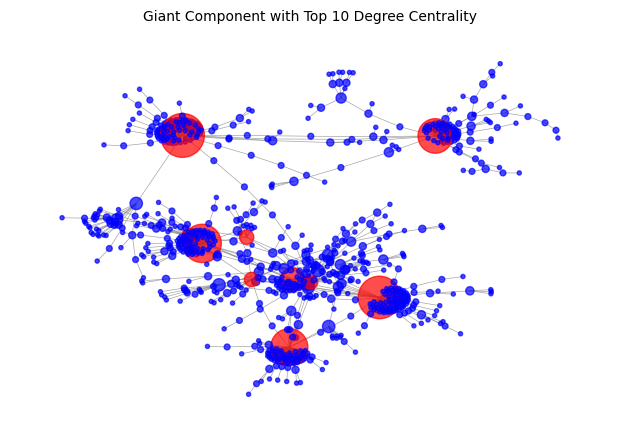

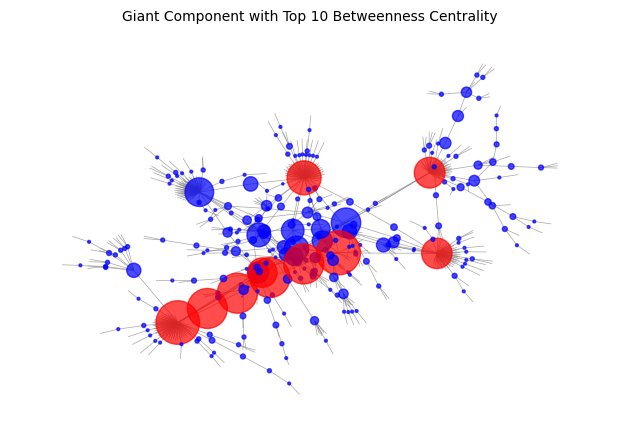

In [ ]:
#Highliting the top 10 nodes with highest degree centrality
def plot_centrality(centrality_measure, centrality_name):
    plt.figure(figsize=(6, 4))

    # Ploting
    normalized_centrality = {node: value / max(centrality_measure.values()) for node, value in centrality_measure.items()}

    top_10_nodes = sorted(centrality_measure, key=centrality_measure.get, reverse=True)[:10]
    node_colors = ['red' if node in top_10_nodes else 'blue' for node in giant_component_graph.nodes()]
    node_sizes = [normalized_centrality[node] * 1000 for node in giant_component_graph.nodes()]

    nx.draw(giant_component_graph, with_labels=False, node_size=node_sizes, node_color=node_colors,
            edge_color="gray", alpha=0.7, width=0.5)

    plt.title(f"Giant Component with Top 10 {centrality_name}", fontsize=10)
    plt.show()


plot_centrality(degree_centrality, "Degree Centrality")
plot_centrality(betweenness_centrality, "Betweenness Centrality")
#plot_centrality(closeness_centrality, "Closeness Centrality")


## 3.- Profiling Analysis:

In order to understand which variables define the behavior of Class 1 and 2, we will explore the variables and thereby define which ones can be considered as potential variables to build a ML model.

In [ ]:
#Using the complete databases and calculating the frequency and percentage of each class in sampled_tx_ids
sampled_class_counts = elliptic_txs_classes['class'].value_counts()
sampled_class_percentages = (sampled_class_counts / len(elliptic_txs_classes)) * 100

# Create a DataFrame for the sampled data
sampled_class_summary = pd.DataFrame({
    'Class': sampled_class_counts.index,
    'Frequency': sampled_class_counts.values,
    'Percentage': sampled_class_percentages.values
})

# Display the table
sampled_class_summary


,Class,Frequency,Percentage
0,unknown,157205,77.148634
1,2,42019,20.620899
2,1,4545,2.230467


In [ ]:
# Create a list of IDs where the class is 2 or 1
target_ids = elliptic_txs_classes[elliptic_txs_classes['class'].isin(["1", "2"])]['txId'].tolist()
print(len(target_ids))

# Use the list to filter sampled_features
filtered_sampled_features = elliptic_txs_features[elliptic_txs_features['txId'].isin(target_ids)]

# Merge the features and classes dataframes
merged_data = pd.merge(filtered_sampled_features, elliptic_txs_classes, on='txId')

# Separate data for class 1 and class 2
class1_data = merged_data[merged_data['class'] == '1']
class2_data = merged_data[merged_data['class'] == '2']


filtered_sampled_features


46564


,txId,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
9,232029206,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792
10,232344069,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
11,27553029,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,...,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
16,3881097,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,...,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203752,80329479,49,-0.159293,-0.037276,1.018602,-0.121970,0.035526,-0.113002,-0.061584,-0.149635,...,1.793987,1.408971,0.231244,-0.388216,-0.098889,1.931078,3.168259,3.707301,-1.390548,-1.214035
203754,158406298,49,-0.172962,-0.126566,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163622,...,-0.577099,0.647874,0.241128,0.241406,10.914916,1.700384,-0.131155,7.914145,-0.120613,-0.119792
203759,158375075,49,-0.170412,-0.078164,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163631,...,1.709623,1.606604,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203763,147478192,49,-0.093732,-0.116160,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.082559,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792


With the variables already defined, we will perform a graphical inspection of the behavior of the variables for each of the categories.

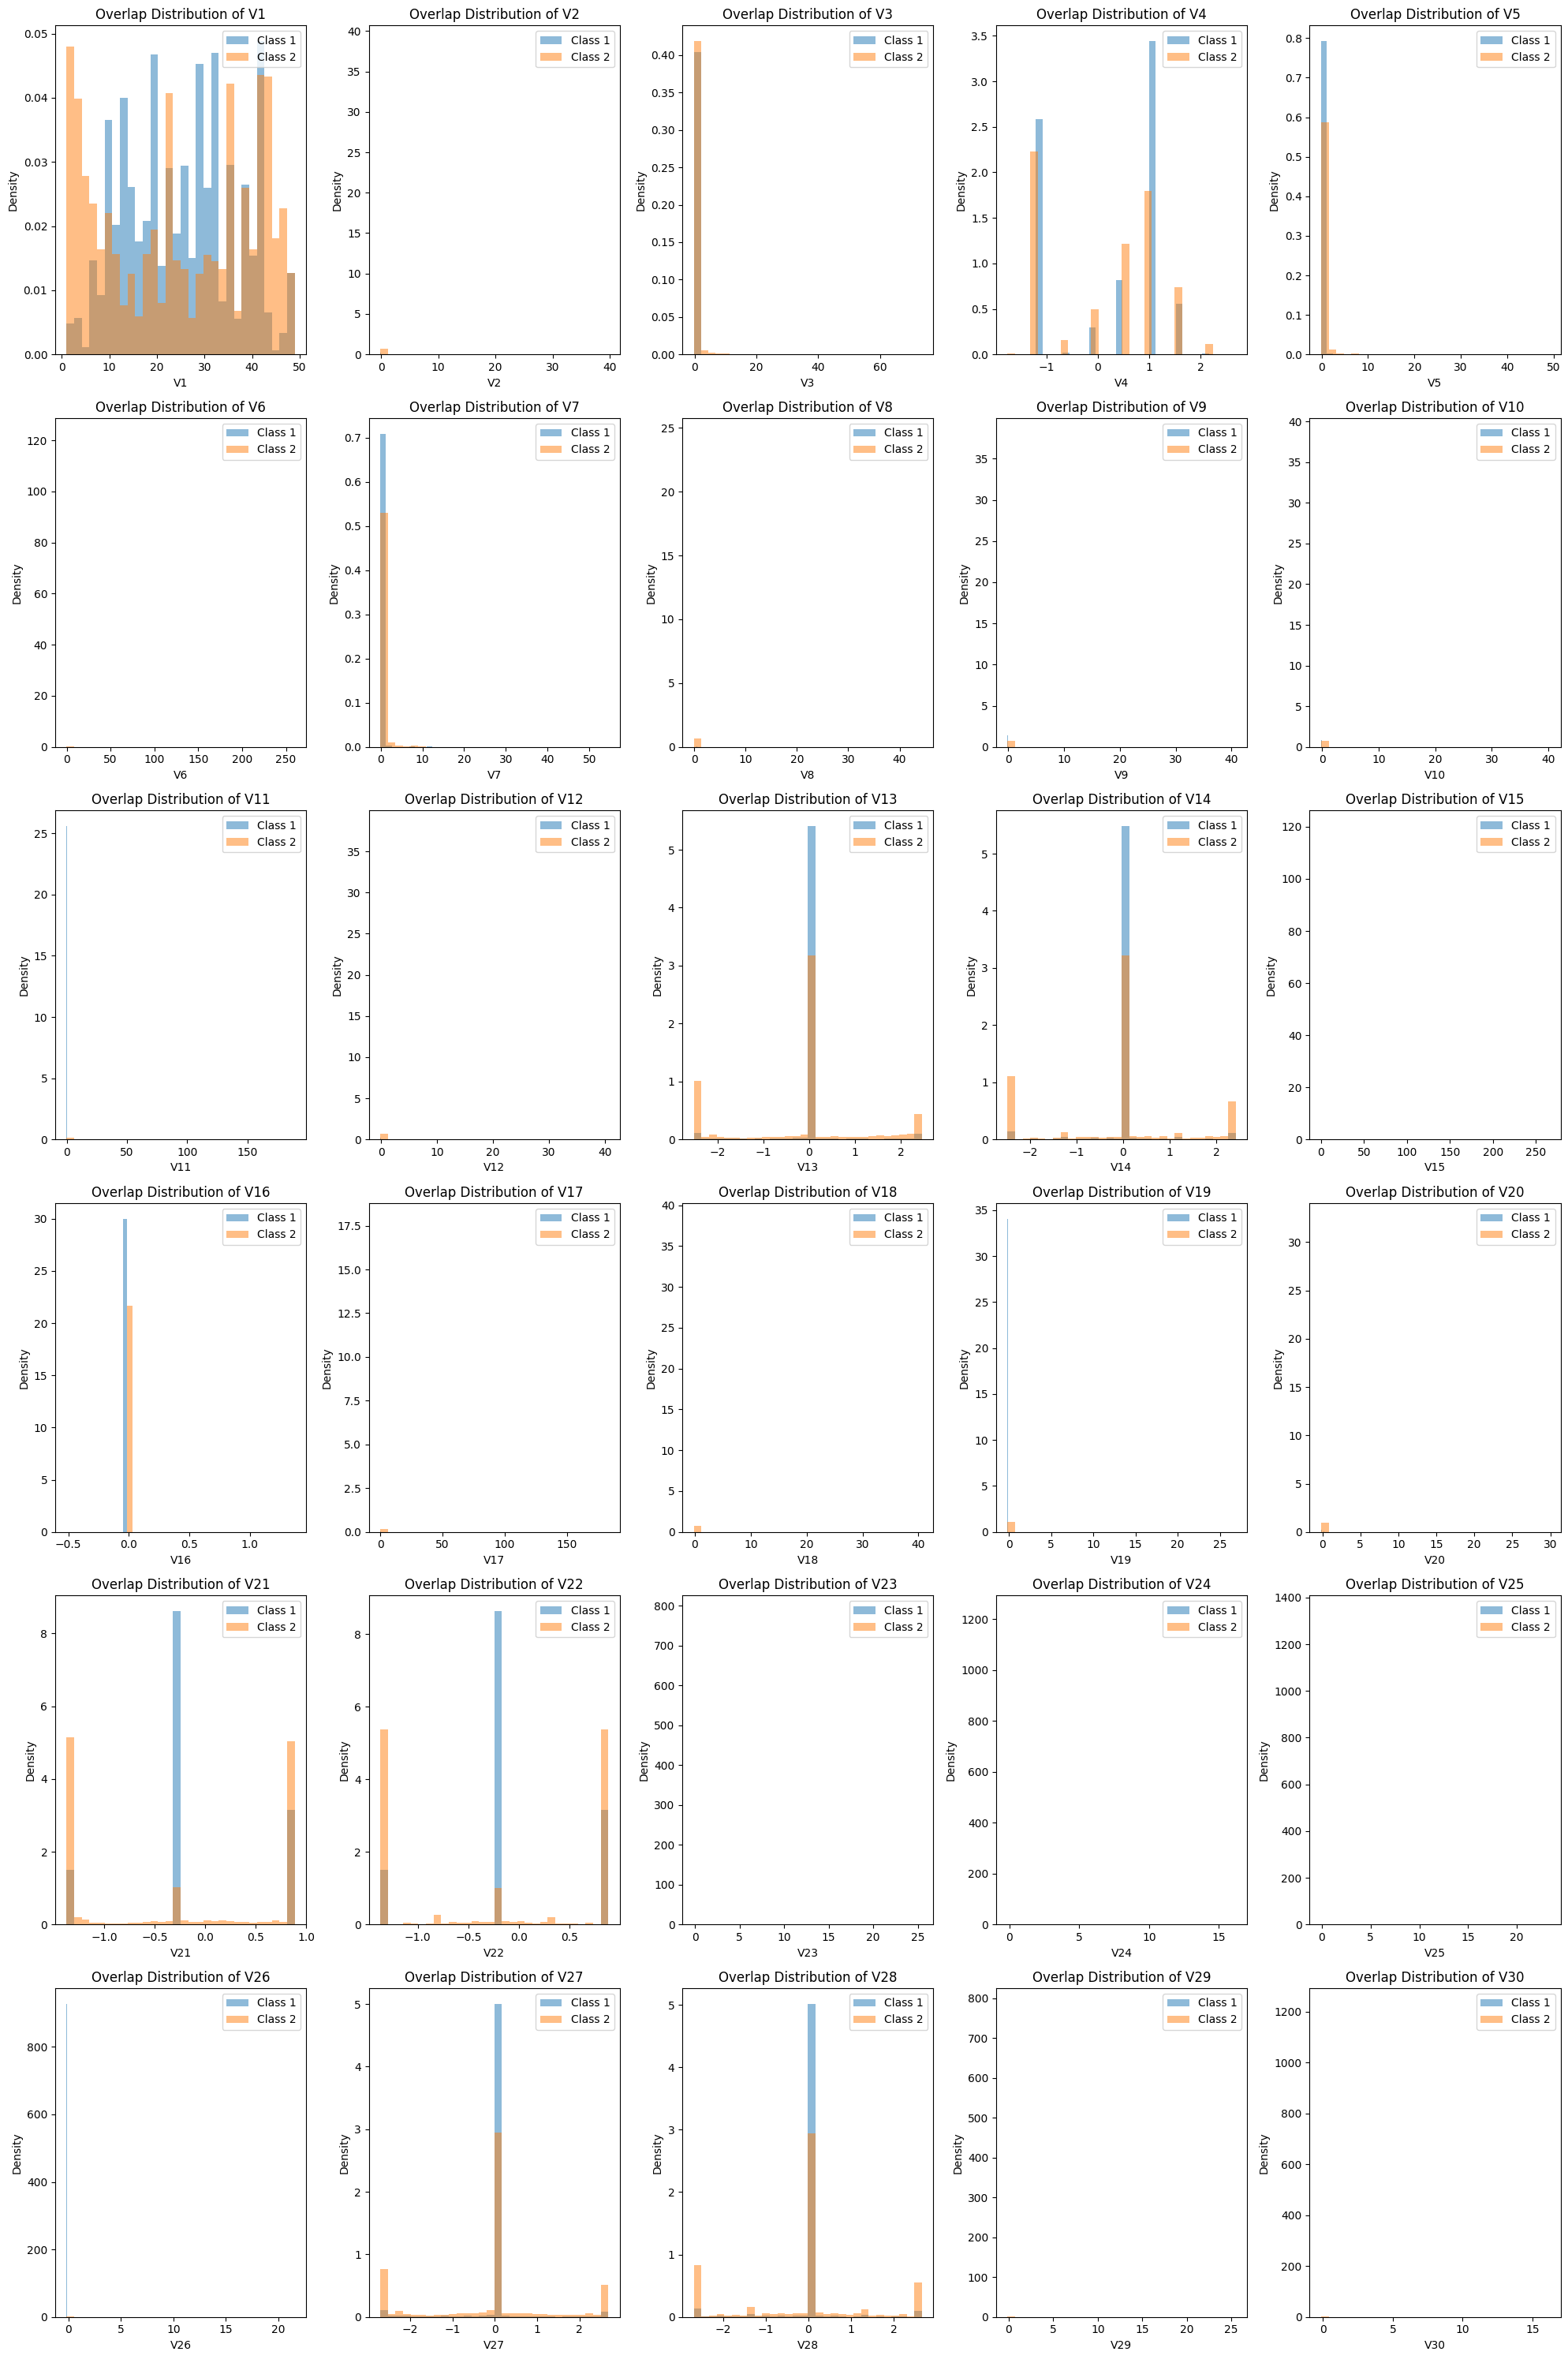

In [ ]:
#Define the number of variables to plot
num_variables_to_plot = 30 #we are gonna use only 30

# Number of plots per row
plots_per_row = 5

# Calculate the number of rows needed
num_rows = (num_variables_to_plot + plots_per_row - 1) // plots_per_row

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()


for i in range(min(num_variables_to_plot, len(filtered_sampled_features.columns) -1)):
    variable_name = f'V{i+1}'
    ax = axes[i]  # Get the current axes object
    ax.hist(class1_data[variable_name], bins=30, alpha=0.5, label='Class 1', density = True)
    ax.hist(class2_data[variable_name], bins=30, alpha=0.5, label='Class 2', density = True)
    ax.set_xlabel(variable_name)
    ax.set_ylabel('Density')
    ax.set_title(f'Overlap Distribution of {variable_name}')
    ax.legend()

# Turn off any unused subplots
for j in range(i+1, len(axes)):
  axes[j].set_axis_off()

plt.tight_layout()
plt.show()

In addition, we will use basic statistics on the variables to understand their behavior and find differences.

In [ ]:
#descriptive statistics:
# Create an empty list to store the results
results = []

def calculate_stats(df, class_label):
    stats = {}
    for col in df.columns:
        if col != 'txId' and col != 'class':
            stats[col] = {
                'mean': df[col].mean(),
                'std': df[col].std(),
                'median': df[col].median(),
                'percentile_25': df[col].quantile(0.25),
                'percentile_50': df[col].quantile(0.50),
                'percentile_75': df[col].quantile(0.75),
                'percentile_99': df[col].quantile(0.99)
            }
    return stats

# Calculate statistics for class 1
class1_stats = calculate_stats(class1_data, '1')
for col, stats in class1_stats.items():
  results.append(['1', col, stats['mean'], stats['std'], stats['median'], stats['percentile_25'], stats['percentile_50'], stats['percentile_75'], stats['percentile_99']])

# Calculate statistics for class 2
class2_stats = calculate_stats(class2_data, '2')

for col, stats in class2_stats.items():
  results.append(['2', col, stats['mean'], stats['std'], stats['median'], stats['percentile_25'], stats['percentile_50'], stats['percentile_75'], stats['percentile_99']])

# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(results, columns=['Class', 'Variable', 'Mean', 'SD', 'Median', 'Percentile_25', 'Percentile_50', 'Percentile_75', 'Percentile_99'])

# Display the table
results_df


,Class,Variable,Mean,SD,Median,Percentile_25,Percentile_50,Percentile_75,Percentile_99
0,1,V1,25.078768,11.357543,25.000000,15.000000,25.000000,33.000000,49.000000
1,1,V2,-0.165745,0.025423,-0.172205,-0.172739,-0.172205,-0.170061,-0.051762
2,1,V3,-0.030698,1.410232,-0.150103,-0.158783,-0.150103,-0.107012,0.581707
3,1,V4,0.212061,1.052829,1.018602,-1.201369,1.018602,1.018602,1.573595
4,1,V5,0.010803,1.478979,-0.121970,-0.121970,-0.121970,-0.121970,1.228706
...,...,...,...,...,...,...,...,...,...
327,2,V162,0.073178,1.819860,-0.087490,-0.087490,-0.087490,-0.068266,2.104098
328,2,V163,0.097227,1.856071,-0.093204,-0.131155,-0.093204,-0.084674,2.704190
329,2,V164,0.063418,1.118783,-0.097524,-0.140597,-0.097524,-0.068808,2.437303
330,2,V165,-0.026191,1.027410,-0.120613,-0.120613,-0.120613,0.419801,1.519700


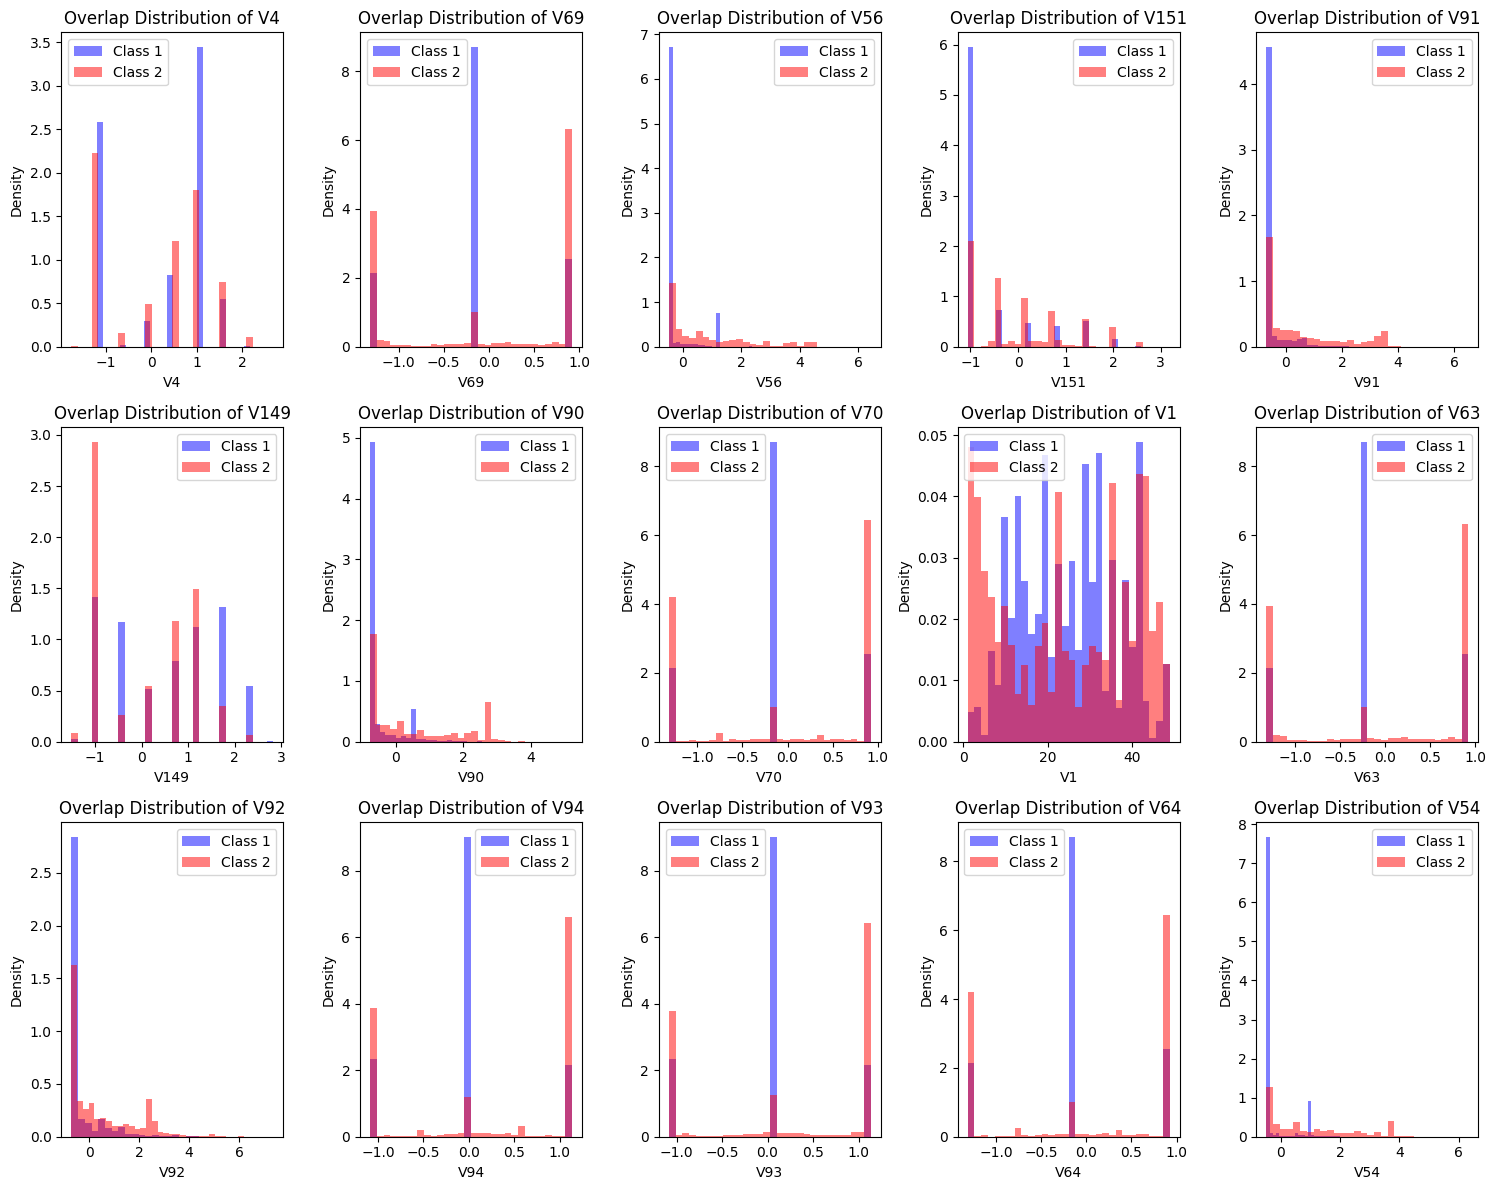

In [ ]:
# Calculate the absolute difference in medians between class 1 and class 2
results_df['Median_Difference'] = results_df.groupby('Variable')['Median'].transform(lambda x: abs(x.iloc[0] - x.iloc[1]) if len(x) == 2 else 0)

# Find the variables with the largest median differences
top_variables = results_df.nlargest(30, 'Median_Difference')['Variable'].tolist()  # Get top 15
top_variables=set(top_variables)

# Number of plots per row
plots_per_row = 5

# Calculate the number of rows needed
num_rows = (len(top_variables) + plots_per_row - 1) // plots_per_row

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 4 * num_rows))
axes = axes.flatten()


for i, variable_name in enumerate(top_variables):
    ax = axes[i]
    ax.hist(class1_data[variable_name], bins=30, alpha=0.5, label='Class 1', color='blue', density=True) # Color for Class 1
    ax.hist(class2_data[variable_name], bins=30, alpha=0.5, label='Class 2', color='red', density=True) # Color for Class 2
    ax.set_xlabel(variable_name)
    ax.set_ylabel('Density')
    ax.set_title(f'Overlap Distribution of {variable_name}')
    ax.legend()

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_axis_off()

plt.tight_layout()
plt.show()


**So, the previous top variables can be considered as potencial features to model the difference between class 1 and 2**. We are gonna validate this hypothesis in the next section.

## 3.- GNN Model

Graph neural networks (GNN) are specialized deep learning methods that are designed for tasks whose inputs are graphs. GNN provides a convenient way for node level, edge level and graph level prediction tasks.
In this section we are gonna use a basic arquitucture.

In [ ]:
!pip install torch-geometric

In [ ]:
import torch
import torch_geometric

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import community as community_louvain
import torch.nn.functional as F


from torch import Tensor
from torch_geometric.nn import GCNConv, GATConv
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import LabelEncoder
from torch_geometric.data import Data
from scipy.stats import ttest_ind

print("Torch version:", torch.__version__)
print("Torch Geometric version:", torch_geometric.__version__)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=mpl.MatplotlibDeprecationWarning)

Torch version: 2.6.0+cu124
Torch Geometric version: 2.6.1


In [ ]:
# Load the dataset
edges = pd.read_csv('/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')
classes = pd.read_csv('/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_classes.csv')
features = pd.read_csv('/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_features.csv', header=None)

We will use a classification approach to model the probability of being "licit" or "illicit" node. FOr that purpose we are only using the class 1 and 2, and removing "unknown" nodes.

In [ ]:
# Remove nodes with 'unknown' class from classes DataFrame
classes = classes[classes['class'] != 'unknown']

# Get the transaction IDs of the remaining nodes
valid_tx_ids = classes['txId'].tolist()

# Filter edges to keep only those connected to valid nodes
edges = edges[edges['txId1'].isin(valid_tx_ids) & edges['txId2'].isin(valid_tx_ids)]

# Filter features to keep only those corresponding to valid nodes
features = features[features[0].isin(valid_tx_ids)]


In [ ]:
# Get the maximum index in the edge list
max_index = max(elliptic_txs_edgelist['txId1'].max(), elliptic_txs_edgelist['txId2'].max())
num_nodes = elliptic_txs_features.shape[0]

# Create a mapping from transaction IDs to feature indices
tx_id_to_index = {tx_id: idx for idx, tx_id in enumerate(features[0])}

# Filter and map edges
valid_edges = elliptic_txs_edgelist[elliptic_txs_edgelist['txId1'].isin(tx_id_to_index) & elliptic_txs_edgelist['txId2'].isin(tx_id_to_index)]
valid_edges['txId1'] = valid_edges['txId1'].map(tx_id_to_index)
valid_edges['txId2'] = valid_edges['txId2'].map(tx_id_to_index)

# Convert to PyTorch tensor
edge_index = torch.tensor(valid_edges.values.T, dtype=torch.long)

<ipython-input-31-e34476e5b942>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_edges['txId1'] = valid_edges['txId1'].map(tx_id_to_index)
<ipython-input-31-e34476e5b942>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_edges['txId2'] = valid_edges['txId2'].map(tx_id_to_index)


In [ ]:
# Extract node features
node_features = torch.tensor(features.drop(columns=[0]).values, dtype=torch.float)

# Encode class labels
le = LabelEncoder()
class_labels = le.fit_transform(classes['class'])
node_labels = torch.tensor(class_labels, dtype=torch.long)

In [ ]:
from torch_geometric.data import Data

# Create the data object
data = Data(x=node_features, edge_index=edge_index, y=node_labels)

# Create masks for training, validation, and testing
num_nodes = data.num_nodes
perm = torch.randperm(num_nodes)
train_size = int(0.7 * num_nodes)
val_size = int(0.15 * num_nodes)
test_size = num_nodes - train_size - val_size

data.train_mask = torch.zeros(num_nodes, dtype=torch.bool)
data.val_mask = torch.zeros(num_nodes, dtype=torch.bool)
data.test_mask = torch.zeros(num_nodes, dtype=torch.bool)

data.train_mask[perm[:train_size]] = True
data.val_mask[perm[train_size:train_size + val_size]] = True
data.test_mask[perm[train_size + val_size:]] = True

In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, 16)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and loss function
model = GCN(num_node_features=data.num_features, num_classes=len(le.classes_))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
# Define the training function
def train(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Define the evaluation function
def evaluate(model, data):
    model.eval()
    with torch.no_grad():
        out = model(data)
        pred = out.argmax(dim=1)
        correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
        accuracy = int(correct) / int(data.test_mask.sum())
    return accuracy

In [ ]:
# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    loss = train(model, data, optimizer, criterion)
    if epoch % 1 == 0:
        val_acc = evaluate(model, data)
        print(f'Epoch {epoch:03d}, Loss: {loss:.4f}, Validation Accuracy: {val_acc:.4f}')

# Evaluate on the test set
test_accuracy = evaluate(model, data)
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 000, Loss: 0.6217, Validation Accuracy: 0.8984
Epoch 001, Loss: 0.3679, Validation Accuracy: 0.8944
Epoch 002, Loss: 0.2686, Validation Accuracy: 0.8342
Epoch 003, Loss: 0.3380, Validation Accuracy: 0.8745
Epoch 004, Loss: 0.2761, Validation Accuracy: 0.9187
Epoch 005, Loss: 0.2230, Validation Accuracy: 0.9191
Epoch 006, Loss: 0.2208, Validation Accuracy: 0.9171
Epoch 007, Loss: 0.2335, Validation Accuracy: 0.9170
Epoch 008, Loss: 0.2392, Validation Accuracy: 0.9188
Epoch 009, Loss: 0.2341, Validation Accuracy: 0.9224
Epoch 010, Loss: 0.2218, Validation Accuracy: 0.9277
Epoch 011, Loss: 0.2081, Validation Accuracy: 0.9274
Epoch 012, Loss: 0.1985, Validation Accuracy: 0.9261
Epoch 013, Loss: 0.1956, Validation Accuracy: 0.9254
Epoch 014, Loss: 0.1968, Validation Accuracy: 0.9237
Epoch 015, Loss: 0.1965, Validation Accuracy: 0.9266
Epoch 016, Loss: 0.1915, Validation Accuracy: 0.9327
Epoch 017, Loss: 0.1835, Validation Accuracy: 0.9372
Epoch 018, Loss: 0.1770, Validation Accuracy: 

In [ ]:
# Define the prediction function
def predict(model, data):
    model.eval()
    with torch.no_grad():
        out = model(data)
        pred = out.argmax(dim=1)
    return pred

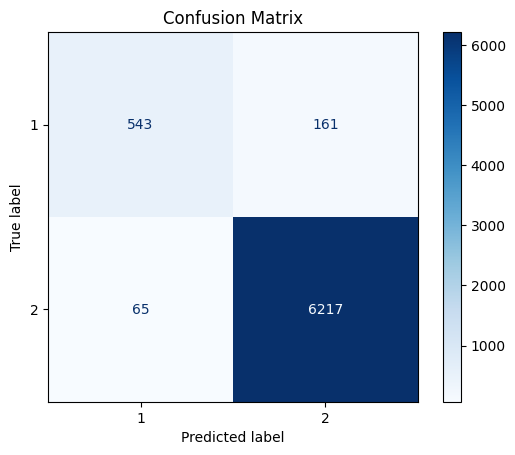

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
test_pred = predict(model, data)[data.test_mask]

# Generate the confusion matrix
cm = confusion_matrix(data.y[data.test_mask].cpu(), test_pred.cpu())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, roc_curve, auc

accuracy = accuracy_score(data.y[data.test_mask].cpu(), test_pred.cpu())

# Calculate ROC AUC
try:
    roc_auc = roc_auc_score(data.y[data.test_mask].cpu(), test_pred.cpu())
except ValueError:
    print("Error calculating ROC AUC. Check if your labels are binary.")
    roc_auc = None


# Calculate F1-score
f1 = f1_score(data.y[data.test_mask].cpu(), test_pred.cpu(), average='weighted') # Use weighted for multi-class

# Calculate Recall
recall = recall_score(data.y[data.test_mask].cpu(), test_pred.cpu(), average='weighted')


# Gini Coefficient
if roc_auc:
    gini = 2*roc_auc -1
else:
  gini = None

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Gini Coefficient: {gini}")


Accuracy: 0.9676495848840538
ROC AUC: 0.8804798974704061
F1 Score: 0.9665886887138545
Recall: 0.9676495848840538
Gini Coefficient: 0.7609597949408122


In [ ]:
metrics = {
    'Metric': ['Accuracy', 'ROC AUC', 'F1 Score', 'Recall', 'Gini Coefficient'],
    'Value': [accuracy, roc_auc, f1, recall, gini]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df.to_markdown(index=False))


| Metric           |    Value |
|:-----------------|---------:|
| Accuracy         | 0.96765  |
| ROC AUC          | 0.88048  |
| F1 Score         | 0.966589 |
| Recall           | 0.96765  |
| Gini Coefficient | 0.76096  |


    Feature  Importance
3        V4    3.236470
88      V89    2.986032
154    V155    2.812809
152    V153    2.502153
2        V3    2.475878
..      ...         ...
30      V31    0.485371
73      V74    0.457001
36      V37    0.419345
70      V71    0.294198
15      V16    0.047162

[166 rows x 2 columns]


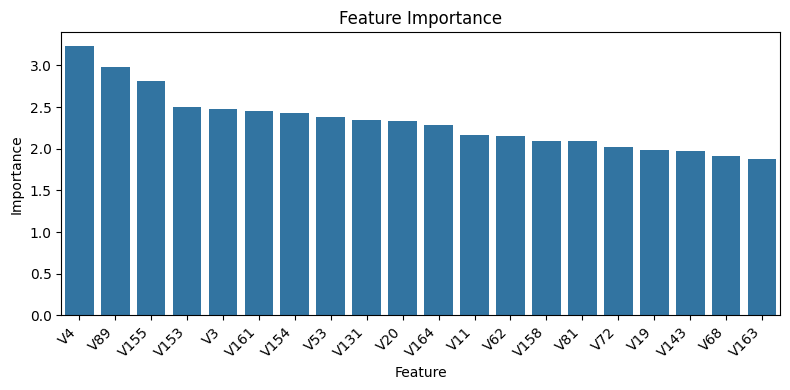

In [ ]:
#Calculating the feauture importance:
importances = model.conv1.lin.weight.detach().abs().sum(dim=0)
feature_importance_df = pd.DataFrame({'Feature': [f'V{i+1}' for i in range(166)], 'Importance': importances.numpy()})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(8, 4))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df.head(20)) # Top 20 features
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

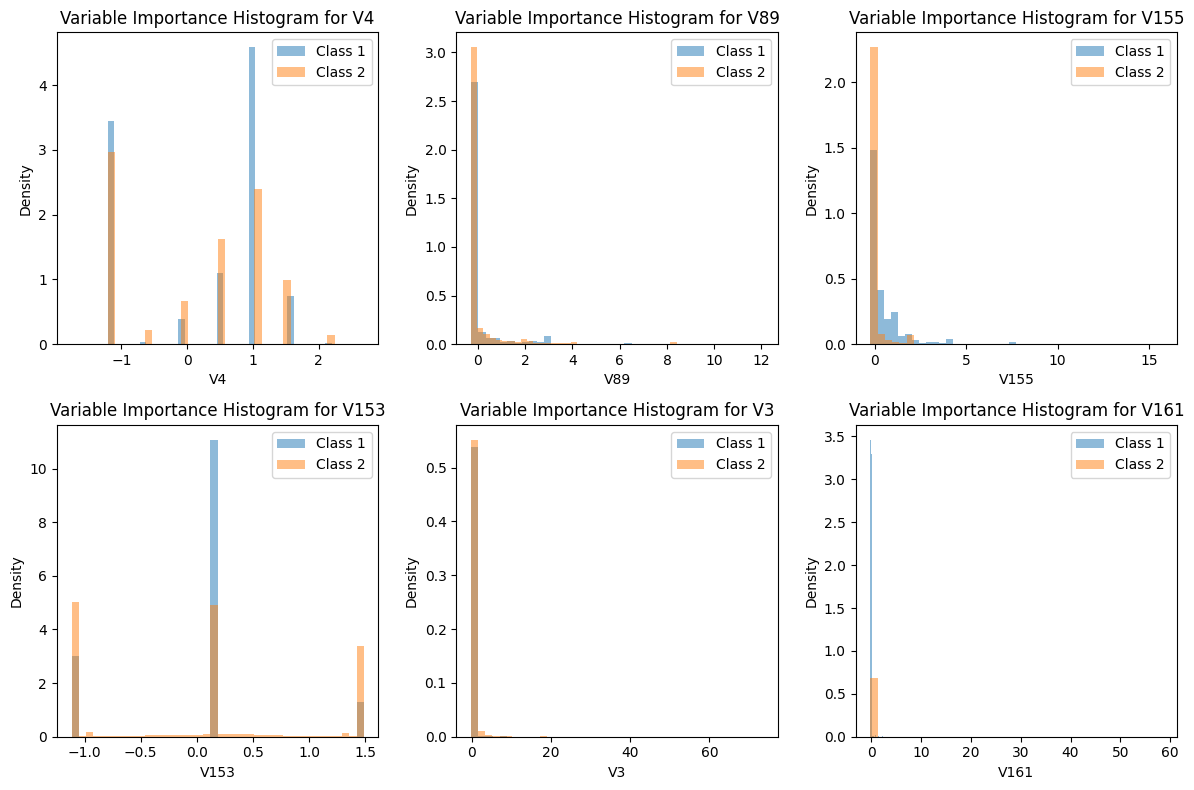

In [ ]:
# Select top 6 features variables by feauture importance
top_5_features = feature_importance_df.head(6)['Feature'].tolist()

# Create subplots for each feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(top_5_features):
    plt.subplot(2, 3, i + 1)
    plt.hist(class1_data[feature], bins=40, alpha=0.5, label='Class 1', density=True)
    plt.hist(class2_data[feature], bins=40, alpha=0.5, label='Class 2', density=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Variable Importance Histogram for {feature}')
    plt.legend()

plt.tight_layout()
plt.show()


## 3.- Anomaly Detection

In [ ]:
!pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-2.1.0+${CUDA}.html

Looking in links: https://data.pyg.org/whl/torch-2.1.0+.html
  Using cached torch_scatter-2.1.2-cp311-cp311-linux_x86_64.whl
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user


In [ ]:
!pip install pygod

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install Torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
#!pip install git+https://github.com/pyg-team/pyg-lib.git
!pip install pyg_lib -f https://data.pyg.org/whl/torch-2.0.0+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.6 MB/s eta 0:00:00


In [ ]:
import torch
import torch_geometric
#import pyg_lib
from torch_geometric.utils import from_networkx
from pygod.detector import DOMINANT

In [ ]:
# Sampling again, dataset needed in order to run DOMINANT
sampled_nodes = elliptic_txs_classes.sample(frac=0.1, random_state=420)
sampled_tx_ids = sampled_nodes['txId'].tolist()
sampled_features = elliptic_txs_features[elliptic_txs_features['txId'].isin(sampled_tx_ids)]
sampled_edgelist = elliptic_txs_edgelist[
    elliptic_txs_edgelist['txId1'].isin(sampled_tx_ids) | elliptic_txs_edgelist['txId2'].isin(sampled_tx_ids)
]

SG = nx.from_pandas_edgelist(sampled_edgelist, 'txId1', 'txId2')

In [ ]:
# Convert the NetworkX graph to a PyG Data object
pyg_data = from_networkx(SG)

tx_id_to_index = {tx_id: index for index, tx_id in enumerate(list(SG.nodes()))}

# Initialize an empty list to store the node features for the PyG graph.
node_features = []

# Iterate over the nodes in the PyG graph.
for tx_id in list(SG.nodes()):
  # Get node features for the current txId from the original features dataframe.
  node_feature = sampled_features[sampled_features["txId"] == tx_id]
  # Append the node feature data to the list
  if len(node_feature) > 0:
      node_features.append(node_feature.iloc[0,1:].values.tolist()) # excluding 'txId' column

node_features = torch.tensor(node_features, dtype=torch.float32)

# 2. Assign node features to the PyG data object
pyg_data.x = node_features

pyg_data


Data(edge_index=[2, 87964], num_nodes=55026, x=[20377, 166])

In [ ]:
# Train DOMINANT detector
clf = DOMINANT()
clf.fit(pyg_data)

# Get anomaly scores
anomaly_scores = clf.decision_scores_

# Print the anomaly scores
print(anomaly_scores)

# Example: Get top 10 anomalous nodes
top_10_anomalous_nodes = anomaly_scores.argsort()[-10:][::-1]
print("\nTop 10 anomalous nodes:", top_10_anomalous_nodes)


## Anex A: Preparing information for <a href="https://gephi.org/">Gephi</a> visualization

In [ ]:
import random
# Set a random seed for reproducibility
random.seed(42)

# Sample the elliptic_txs_classes DataFrame
sample_percentage = 5
sampled_elliptic_txs_classes = elliptic_txs_classes.sample(frac=sample_percentage/100, random_state=42)

# Validate the number of rows and columns in the sampled DataFrame
print("\nSampled elliptic_txs_classes:")
print("Rows:", sampled_elliptic_txs_classes.shape[0], ", Cols:", sampled_elliptic_txs_classes.shape[1])

# Display a small sample of the sampled dataset
print(sampled_elliptic_txs_classes.head())



Sampled elliptic_txs_classes:
Rows: 10188 , Cols: 2
             txId    class
196048  205648424  unknown
16006   246059485  unknown
26188   209250952  unknown
28018   224242088  unknown
139710   70438228  unknown


In [ ]:
# Calculate class counts
class_counts = sampled_elliptic_txs_classes['class'].value_counts()

# Calculate class percentages
class_percentages = (class_counts / len(sampled_elliptic_txs_classes)) * 100

# Create a new DataFrame with counts and percentages
class_summary = pd.DataFrame({'Class': class_counts.index, 'Count': class_counts.values, 'Percentage': class_percentages.values})

# Display the summary table
class_summary


,Class,Count,Percentage
0,unknown,7838,76.933647
1,2,2100,20.612485
2,1,250,2.453867


In [ ]:
# Extract txIds from sampled_elliptic_txs_classes
sampled_txids = sampled_elliptic_txs_classes['txId'].tolist()

# Filter elliptic_txs_edgelist to include only rows where txId is in sampled_txids
filtered_edgelist = elliptic_txs_edgelist[elliptic_txs_edgelist['txId1'].isin(sampled_txids) | elliptic_txs_edgelist['txId2'].isin(sampled_txids)]

# Create a new database (DataFrame)
sampled_elliptic_txs_edgelist = filtered_edgelist[['txId1', 'txId2']] # Select only the txId columns

# Print some info and the first few rows of the new database
print("Shape of the new database:", sampled_elliptic_txs_edgelist.shape)
print(sampled_elliptic_txs_edgelist.head())


Shape of the new database: (23043, 2)
        txId1      txId2
2   230460314  230459870
3   230333930  230595899
6    36411953  230405052
16  233591710  234439913
35  230519287  194810163


In [ ]:
# Check if all txId1 and txId2 values from sampled_elliptic_txs_edgelist exist in sampled_elliptic_txs_classes
txid1_valid = sampled_elliptic_txs_edgelist['txId1'].isin(sampled_elliptic_txs_classes['txId'])
txid2_valid = sampled_elliptic_txs_edgelist['txId2'].isin(sampled_elliptic_txs_classes['txId'])

all_txids_valid = txid1_valid & txid2_valid

# Count the number of invalid txIds
invalid_txid_count = (~all_txids_valid).sum()

print(f"Number of invalid txIds: {invalid_txid_count}")

if invalid_txid_count == 0:
  print("All txId1 and txId2 values are present in sampled_elliptic_txs_classes.")
else:
  print("Some txId1 or txId2 values are missing from sampled_elliptic_txs_classes.")

# Display the invalid txids for further analysis (optional)
invalid_txids = sampled_elliptic_txs_edgelist[~all_txids_valid]
print("\nInvalid txIds:")
invalid_txids


Number of invalid txIds: 22451
Some txId1 or txId2 values are missing from sampled_elliptic_txs_classes.

Invalid txIds:


,txId1,txId2
2,230460314,230459870
3,230333930,230595899
6,36411953,230405052
16,233591710,234439913
35,230519287,194810163
...,...,...
234334,158361728,158569776
234340,158574502,109383451
234347,157631640,21644119
234350,158365409,157930723


In [45]:
# Rename columns
sampled_elliptic_txs_edgelist = sampled_elliptic_txs_edgelist.rename(columns={'txId1': 'SOURCE', 'txId2': 'TARGET'})
sampled_elliptic_txs_classes = sampled_elliptic_txs_classes.rename(columns={'txId': 'ID', 'class': 'class'})

# Export to CSV
sampled_elliptic_txs_classes.to_csv('sampled_elliptic_txs_classes.csv', index=False)
sampled_elliptic_txs_edgelist.to_csv('sampled_elliptic_txs_edgelist.csv', index=False)